# Accumulation Distribution Line (ADL)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:accumulation_distribution_line

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-06-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,187.990005,190.259995,187.750000,190.240005,188.109222,23442500
2018-06-04,191.639999,193.419998,191.350006,191.830002,189.681396,26266200
2018-06-05,193.070007,193.940002,192.360001,193.309998,191.144821,21566000
2018-06-06,193.630005,194.080002,191.919998,193.979996,191.807312,20933600
2018-06-07,194.139999,194.199997,192.339996,193.460007,191.293152,21347200


In [3]:
df['MF Multiplier'] = (2*df['Adj Close'] - df['Low'] - df['High'])/(df['High']-df['Low'])
df['MF Volume'] = df['MF Multiplier']*df['Volume']
df['ADL'] = df['MF Volume'].cumsum()
df = df.drop(['MF Multiplier','MF Volume'],axis=1)

In [4]:
df['VolumePositive'] = df['Open'] < df['Adj Close']

Text(0.5,0,'Date')

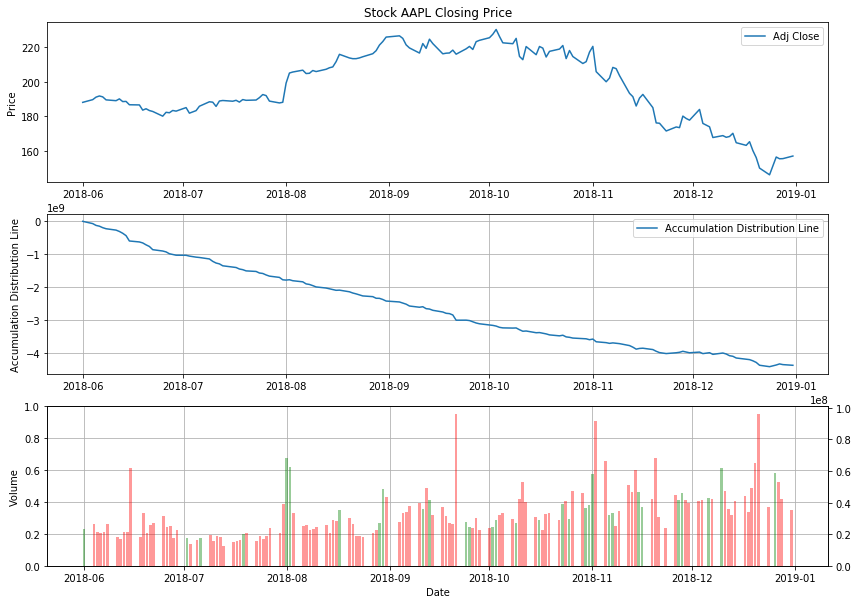

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')

## Candlestick with ADL

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADL,VolumePositive
0,736846.0,187.990005,190.259995,187.750000,190.240005,188.109222,23442500,-1.673248e+07,True
1,736849.0,191.639999,193.419998,191.350006,191.830002,189.681396,26266200,-8.534478e+07,False
2,736850.0,193.070007,193.940002,192.360001,193.309998,191.144821,21566000,-1.400836e+08,False
3,736851.0,193.630005,194.080002,191.919998,193.979996,191.807312,20933600,-1.632014e+08,False
4,736852.0,194.139999,194.199997,192.339996,193.460007,191.293152,21347200,-2.085778e+08,False


Text(0.5,0,'Date')

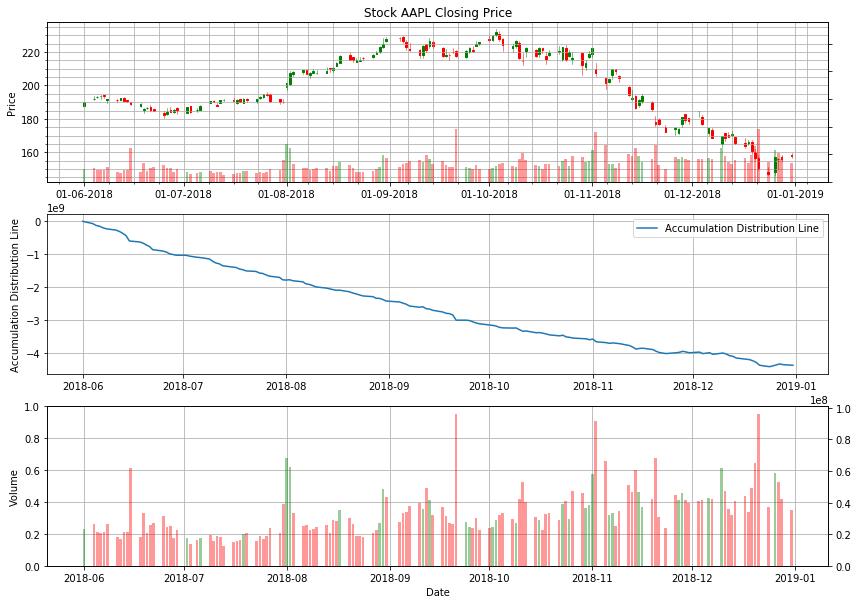

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')